# 🧠 Decision Tree Classifier on Bank Marketing Dataset
This notebook builds a decision tree classifier to predict whether a customer will purchase a product based on demographic and behavioral data.

In [10]:
# 📦 Install required libraries (if not already installed)
!pip install pandas scikit-learn matplotlib seaborn

In [26]:
# 📥 Load the dataset
import pandas as pd

df = pd.read_csv(r"C:\Users\temp\Downloads\bank-additional\bank-additional\bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
# 🧹 Data preprocessing
# Drop 'duration' as advised in the dataset description
df = df.drop(columns=['duration'])
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
# Define features and target

X = df_encoded.drop("y_yes", axis=1)
y = df_encoded["y_yes"]

In [30]:
# ✂️ Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# 🌳 Train the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [34]:
# 📈 Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9002994254268836
Confusion Matrix:
 [[10763   205]
 [ 1027   362]]
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.95     10968
        True       0.64      0.26      0.37      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357



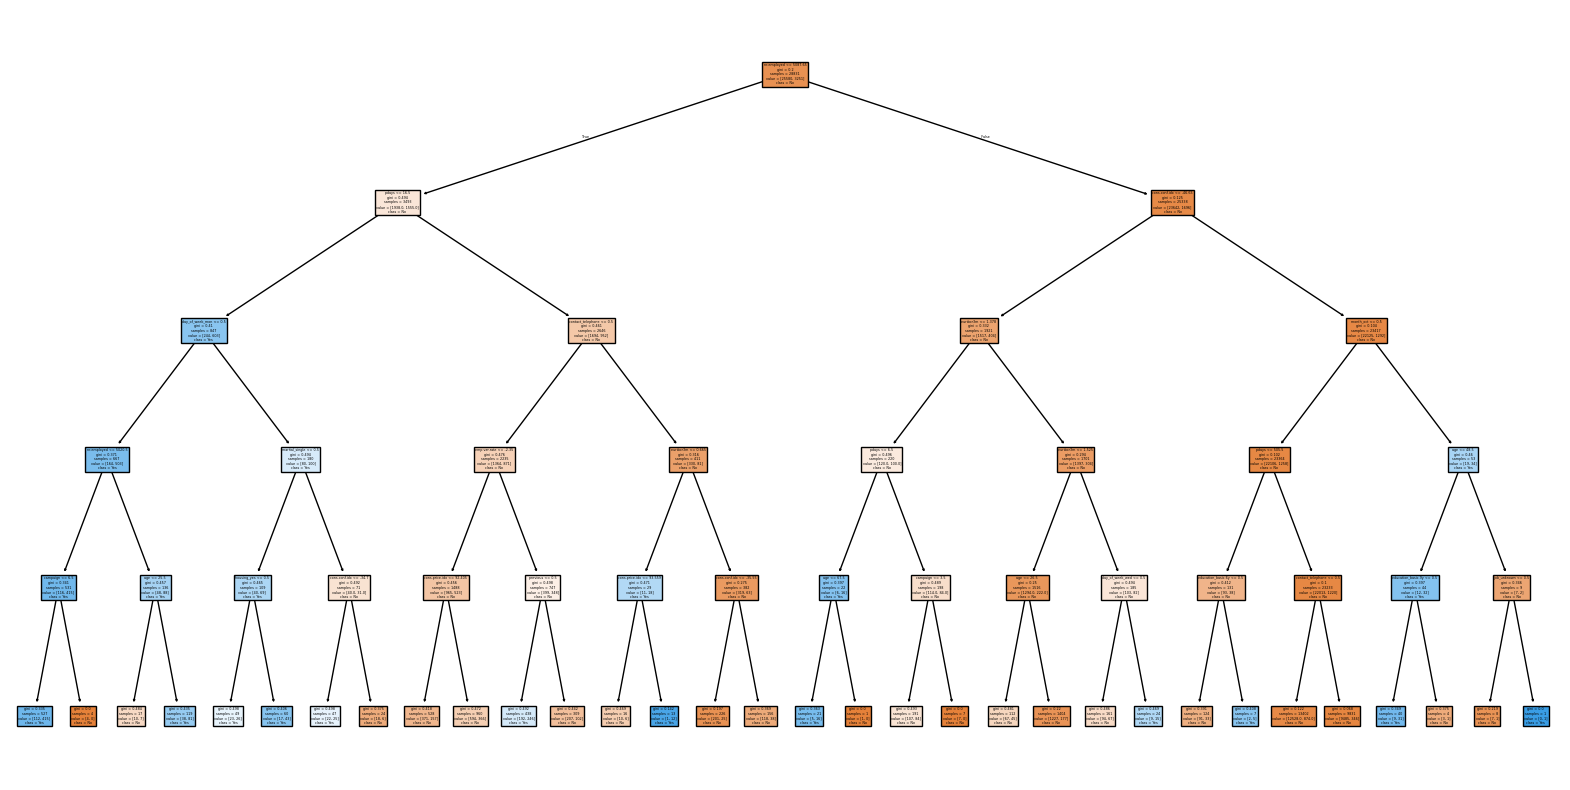

In [36]:
# 🌳📊 Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

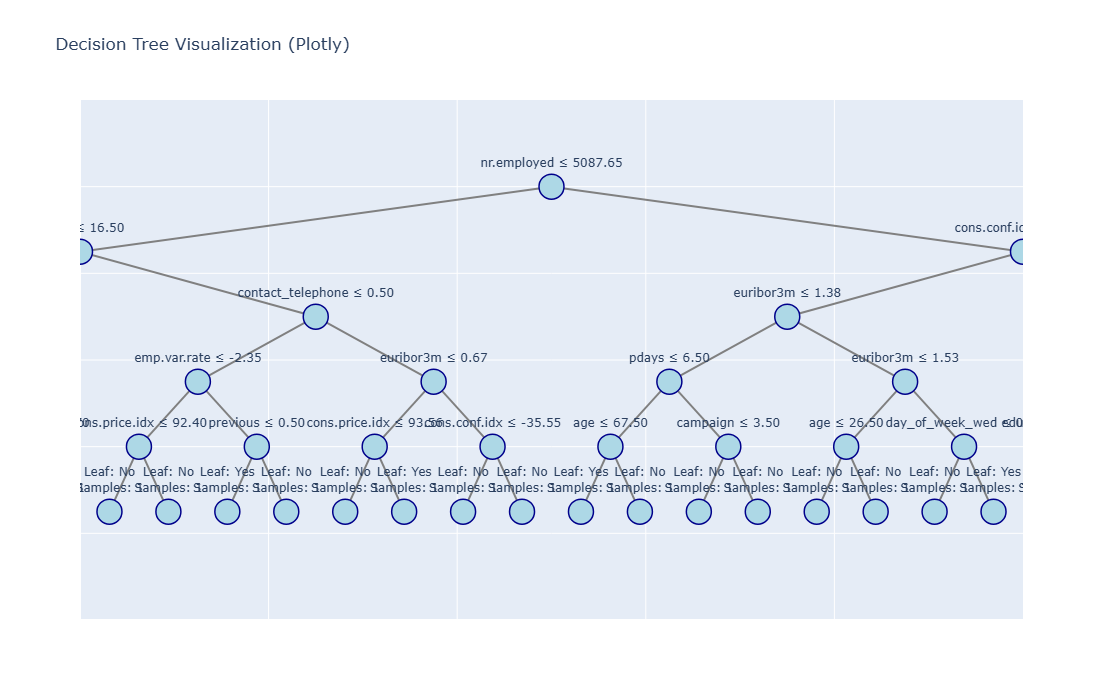

In [42]:
import plotly.graph_objects as go
from sklearn.tree import _tree

def plot_tree_plotly(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth=0, x=0.5, y=1.0, dx=1.0):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            left_x = x - dx / (2 ** (depth + 1))
            right_x = x + dx / (2 ** (depth + 1))
            new_y = y - 0.15

            nodes.append(dict(x=x, y=y, text=f"{name} ≤ {threshold:.2f}", node=node))

            edges.append(dict(x0=x, y0=y, x1=left_x, y1=new_y))
            recurse(tree_.children_left[node], depth + 1, left_x, new_y, dx)

            edges.append(dict(x0=x, y0=y, x1=right_x, y1=new_y))
            recurse(tree_.children_right[node], depth + 1, right_x, new_y, dx)
        else:
            value = tree_.value[node][0]
            class_label = class_names[value.argmax()]
            nodes.append(dict(x=x, y=y, text=f"Leaf: {class_label}<br>Samples: {int(value.sum())}", node=node))

    nodes = []
    edges = []

    recurse(0)

    edge_x = []
    edge_y = []
    for edge in edges:
        edge_x += [edge["x0"], edge["x1"], None]
        edge_y += [edge["y0"], edge["y1"], None]

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=edge_x, y=edge_y,
        mode='lines',
        line=dict(color='gray'),
        hoverinfo='none'
    ))

    for node in nodes:
        fig.add_trace(go.Scatter(
            x=[node["x"]],
            y=[node["y"]],
            text=[node["text"]],
            mode="markers+text",
            textposition="top center",
            marker=dict(size=25, color="lightblue", line=dict(width=1.5, color='darkblue'))
        ))

    fig.update_layout(
        showlegend=False,
        xaxis=dict(showticklabels=False, range=[0, 1]),
        yaxis=dict(showticklabels=False, range=[0, 1.2]),
        title="Decision Tree Visualization (Plotly)",
        height=700
    )

    fig.show()

# Call with your trained classifier
plot_tree_plotly(clf, feature_names=X.columns, class_names=['No', 'Yes'])
